In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import os
os.chdir('/home/ubuntu/Masters_Thesis/scripts')
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/ubuntu/Masters_Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

In [2]:
W = 7

In [3]:
processed = pd.read_csv(f'/home/ubuntu/Masters_Thesis/results/final_results/final_model_results/Processed_Result_W{W}.csv')
nonprocessed = pd.read_csv(f'/home/ubuntu/Masters_Thesis/results/final_results/final_model_results/NonProcessed_Result_W{W}.csv')

In [4]:
processed.drop(columns={'Unnamed: 0'}, inplace = True)
nonprocessed.drop(columns={'Unnamed: 0'}, inplace = True)

In [5]:
full_data = pd.merge(nonprocessed, processed, on=['network_name', 'feature'], suffixes=('_np', '_p'))

In [6]:
full_data

,network_name,mae_15_100_np,feature,mae_30_100_np,mae_15_500_np,mae_30_500_np,mae_15_100_p,mae_30_100_p,mae_15_500_p,mae_30_500_p
0,CNN,635.245908,Price-Only,541.757062,594.214681,699.928842,635.245908,541.757062,594.214681,699.928842
1,GRU,607.986103,Price-Only,373.496476,549.930154,976.983117,607.986103,373.496476,549.930154,976.983117
2,LSTM,694.727559,Price-Only,804.393650,987.645253,931.135228,694.727559,804.393650,987.645253,931.135228
3,LSTM_GRU,1083.069893,Price-Only,1016.937410,850.835273,758.615909,1083.069893,1016.937410,850.835273,758.615909
4,RNN,808.163752,Price-Only,745.233675,1125.802543,1050.056789,808.163752,745.233675,1125.802543,1050.056789
5,RNN_GRU,1031.600144,Price-Only,1067.134534,1365.025800,972.756346,1031.600144,1067.134534,1365.025800,972.756346
6,CNN,586.283648,Bert,659.561106,586.535733,533.811349,587.532269,532.686539,484.122902,586.659094
7,CNN,575.532439,Flair,692.363553,497.755342,636.792540,595.311248,548.220762,582.486638,626.270139
8,CNN,642.021659,Roberta,791.595031,479.197964,723.572816,631.173967,577.972918,628.537933,547.831439
9,CNN,587.094463,TB_Polarity,645.127139,633.878411,885.703140,578.669969,493.028911,772.262035,502.665717


In [7]:
full_data.set_index(['network_name', 'feature'], inplace=True)
min_values = full_data.min(axis=1)
min_values = min_values.reset_index(name='min_mae')

In [8]:
result_df = min_values.pivot_table(index='network_name', columns='feature', values='min_mae', aggfunc='min')
result_df = result_df[['Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta', 'Price-Only']]

In [9]:
result_df

feature,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta,Price-Only
network_name,,,,,,,
CNN,497.755342,493.028911,470.804313,516.397770,484.122902,479.197964,541.757062
GRU,356.468750,302.789699,341.184004,331.904284,343.866589,372.370698,373.496476
LSTM,431.744888,309.083940,443.295042,331.037418,398.265845,513.333488,694.727559
LSTM_GRU,346.890071,370.161890,368.585978,346.808358,411.912481,253.991857,758.615909
RNN,534.900047,523.219507,515.716093,515.612067,494.292023,567.907500,745.233675
RNN_GRU,721.862850,613.971627,620.469428,600.405422,600.307097,630.667668,972.756346


In [10]:
full_data = full_data.reset_index()

best_model_details = []

for model in result_df.index:
    for feature in result_df.columns:
        network_name = model
        target_value = result_df.loc[model, feature]
        col_name = full_data[(full_data['network_name'] == network_name) & (full_data['feature'] == feature)].eq(target_value).idxmax(axis=1)
        _, input_dimension, epochs, pr = col_name.iloc[0].split('_')
        if pr == 'p':
            processed = True
        else:
            processed = False
        best_model_details.append({'network_name': network_name, 'feature': feature, 'MAE': target_value, 'Processed': processed, 'epochs': epochs, 'input_dimension': input_dimension,})
        
best_model_details = pd.DataFrame(best_model_details)

In [11]:
best_model_details.sort_values('MAE', ascending=True)

,network_name,feature,MAE,Processed,epochs,input_dimension
26,LSTM_GRU,Roberta,253.991857,True,500,30
8,GRU,TB_Polarity,302.789699,True,100,30
15,LSTM,TB_Polarity,309.083940,False,100,30
17,LSTM,Vader,331.037418,False,100,30
10,GRU,Vader,331.904284,True,100,30
9,GRU,TB_Subjectivity,341.184004,True,100,30
11,GRU,Bert,343.866589,True,100,30
24,LSTM_GRU,Vader,346.808358,True,500,30
21,LSTM_GRU,Flair,346.890071,False,500,30
7,GRU,Flair,356.468750,True,100,30


In [12]:
full_data.set_index(['network_name', 'feature'], inplace=True)
stacked = full_data.stack()
lowest_10 = stacked.sort_values().head(20)
lowest_10_df = lowest_10.reset_index()
lowest_10_df.columns = ['network_name', 'feature', 'column', 'mae']

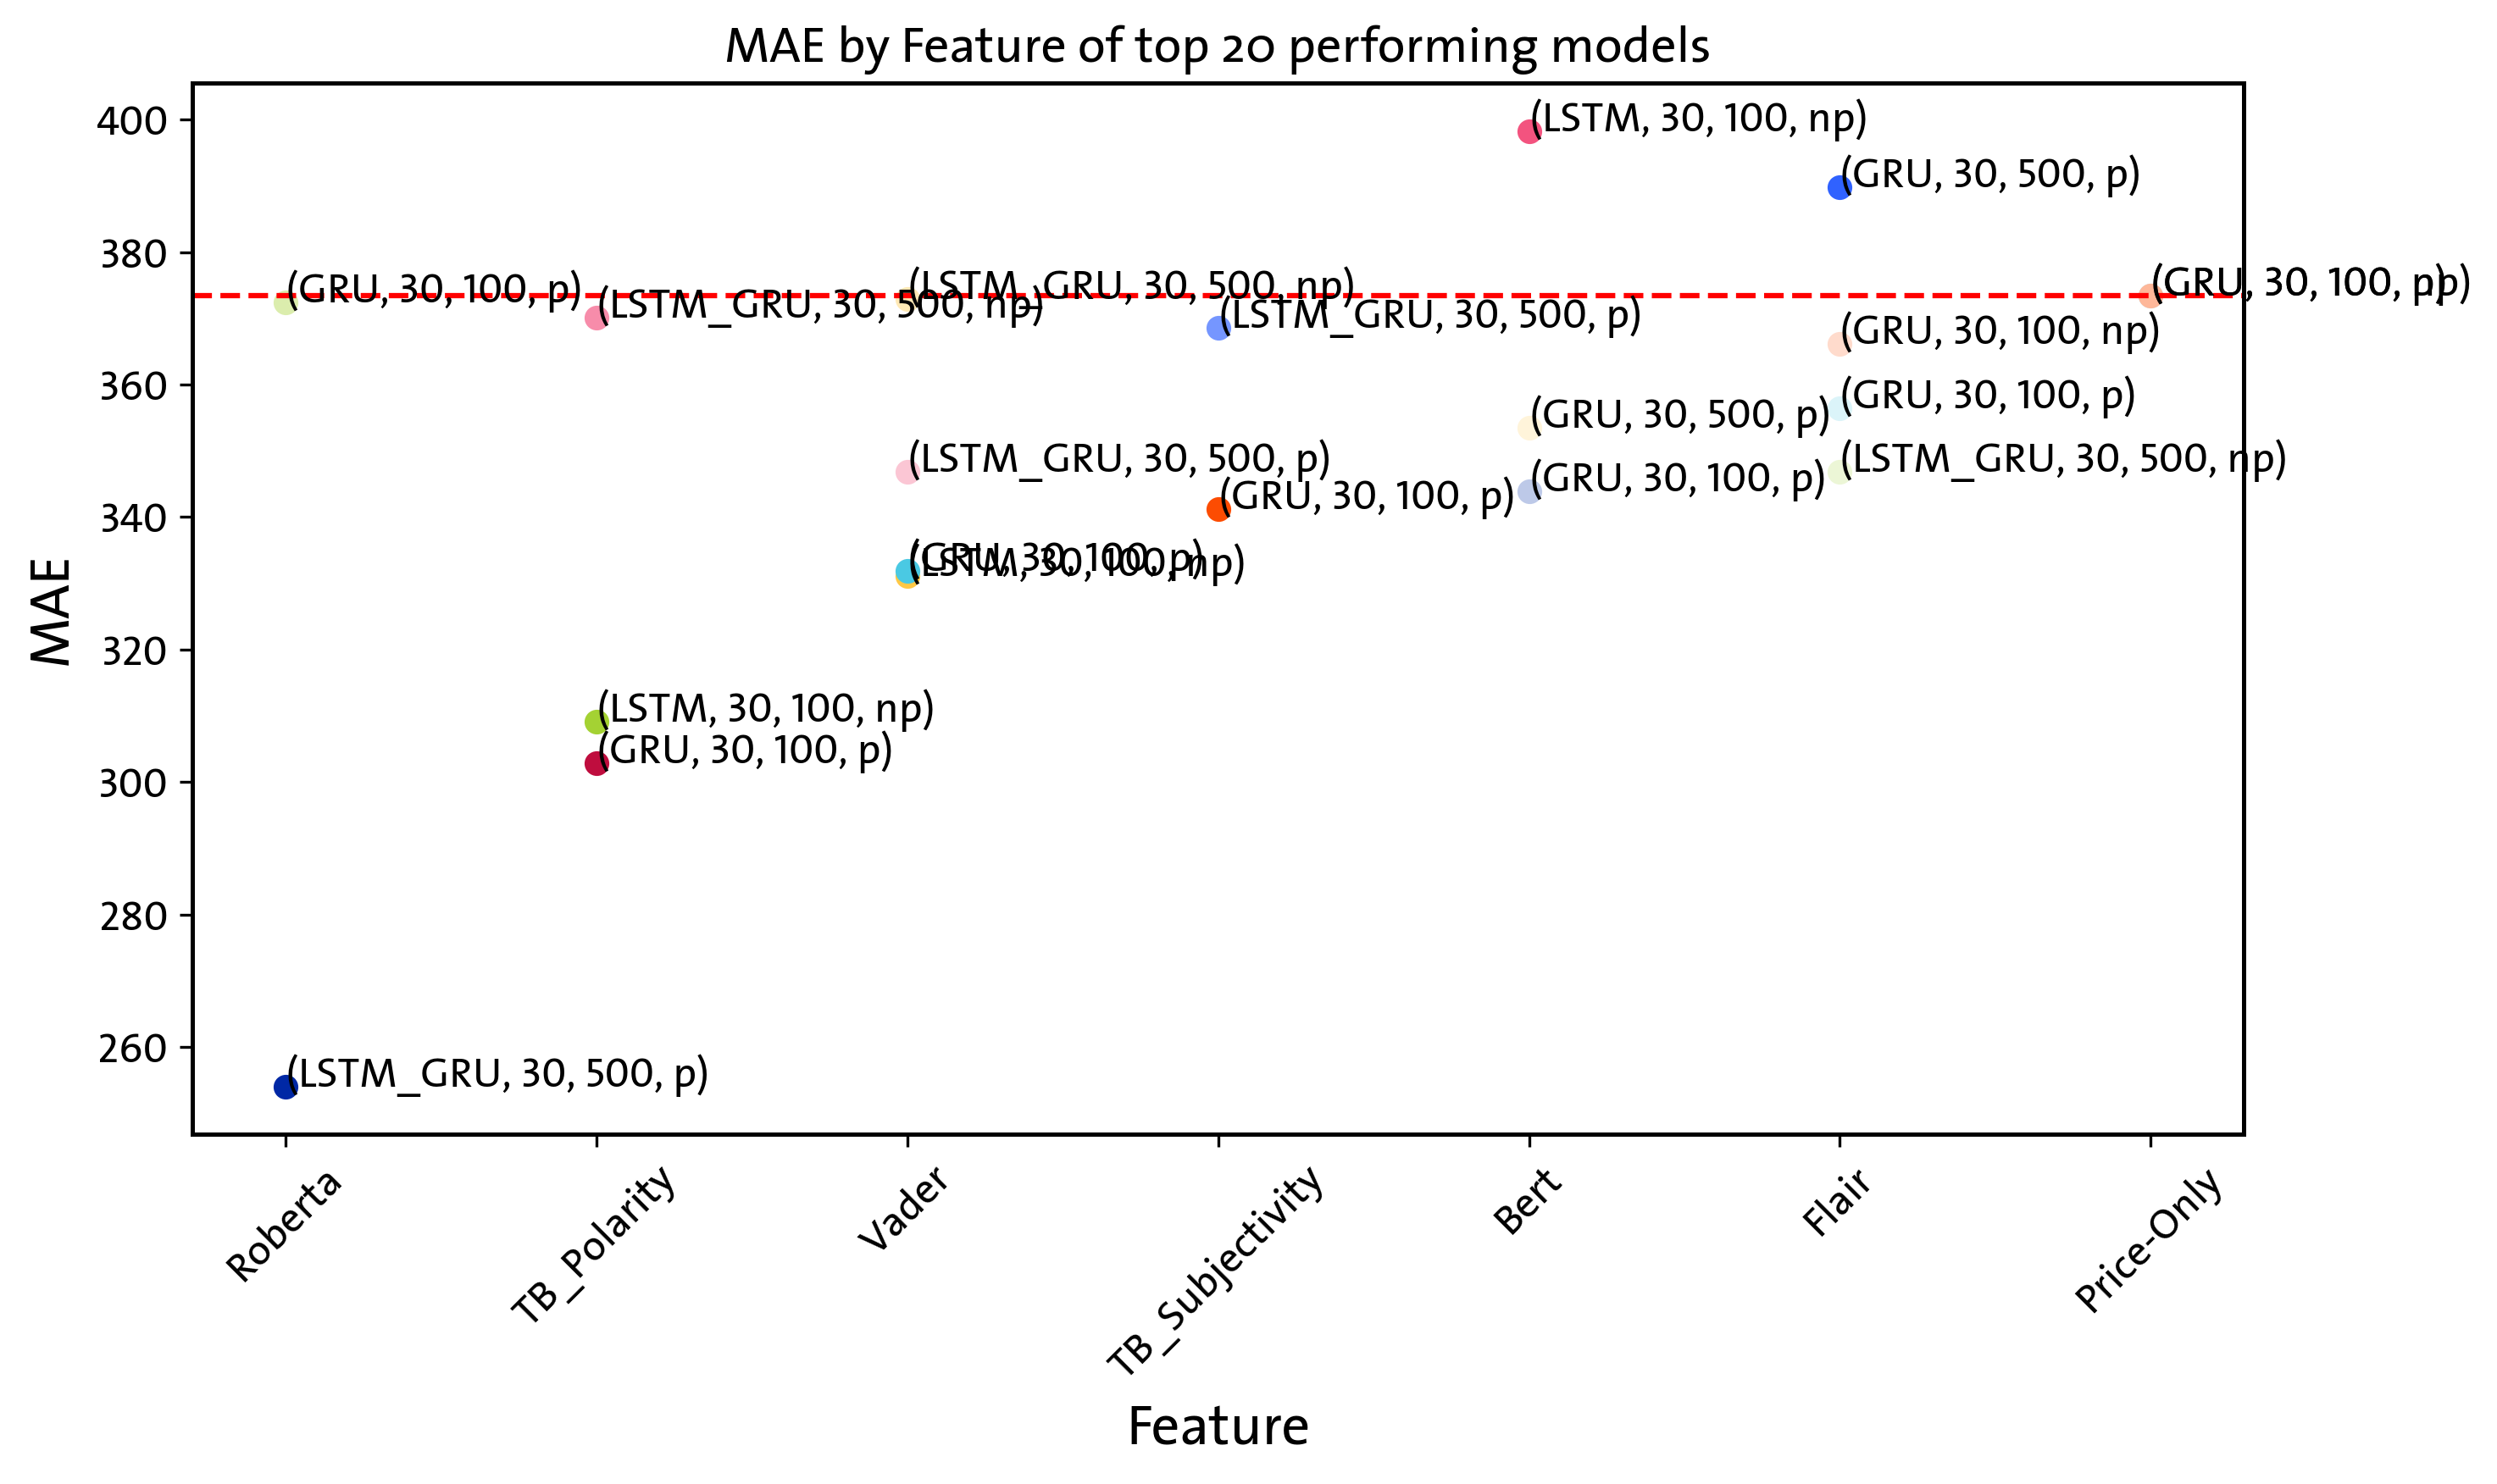

In [13]:
def plot_point_graph(df):
    df = df 
    plt.figure(figsize=(10, 6))
    
    min_price_only = df.loc[df['feature'] == 'Price-Only', 'mae'].min()
    
    for index, row in df.iterrows():
        plt.scatter(row['feature'], row['mae'], label=row['network_name'])
        plt.text(row['feature'], row['mae'], f"({row['network_name']}, {row['column'].split('_')[-3]}, {row['column'].split('_')[-2]}, {row['column'].split('_')[-1]})")

    plt.axhline(y=min_price_only, color='r', linestyle='--', label=f'Least Price-Only Value ({min_price_only:.2f})')
    
    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('MAE')
    plt.title('MAE by Feature of top 20 performing models')
    plt.xticks(rotation=45)

    # Show plot
    plt.tight_layout()
    plt.savefig(f'/home/ubuntu/Masters_Thesis/results/result_plots/Top20MAEFeaturePlot_W{W+1}.pdf', bbox_inches='tight', facecolor='white')
    plt.show()
    
plot_point_graph(lowest_10_df)

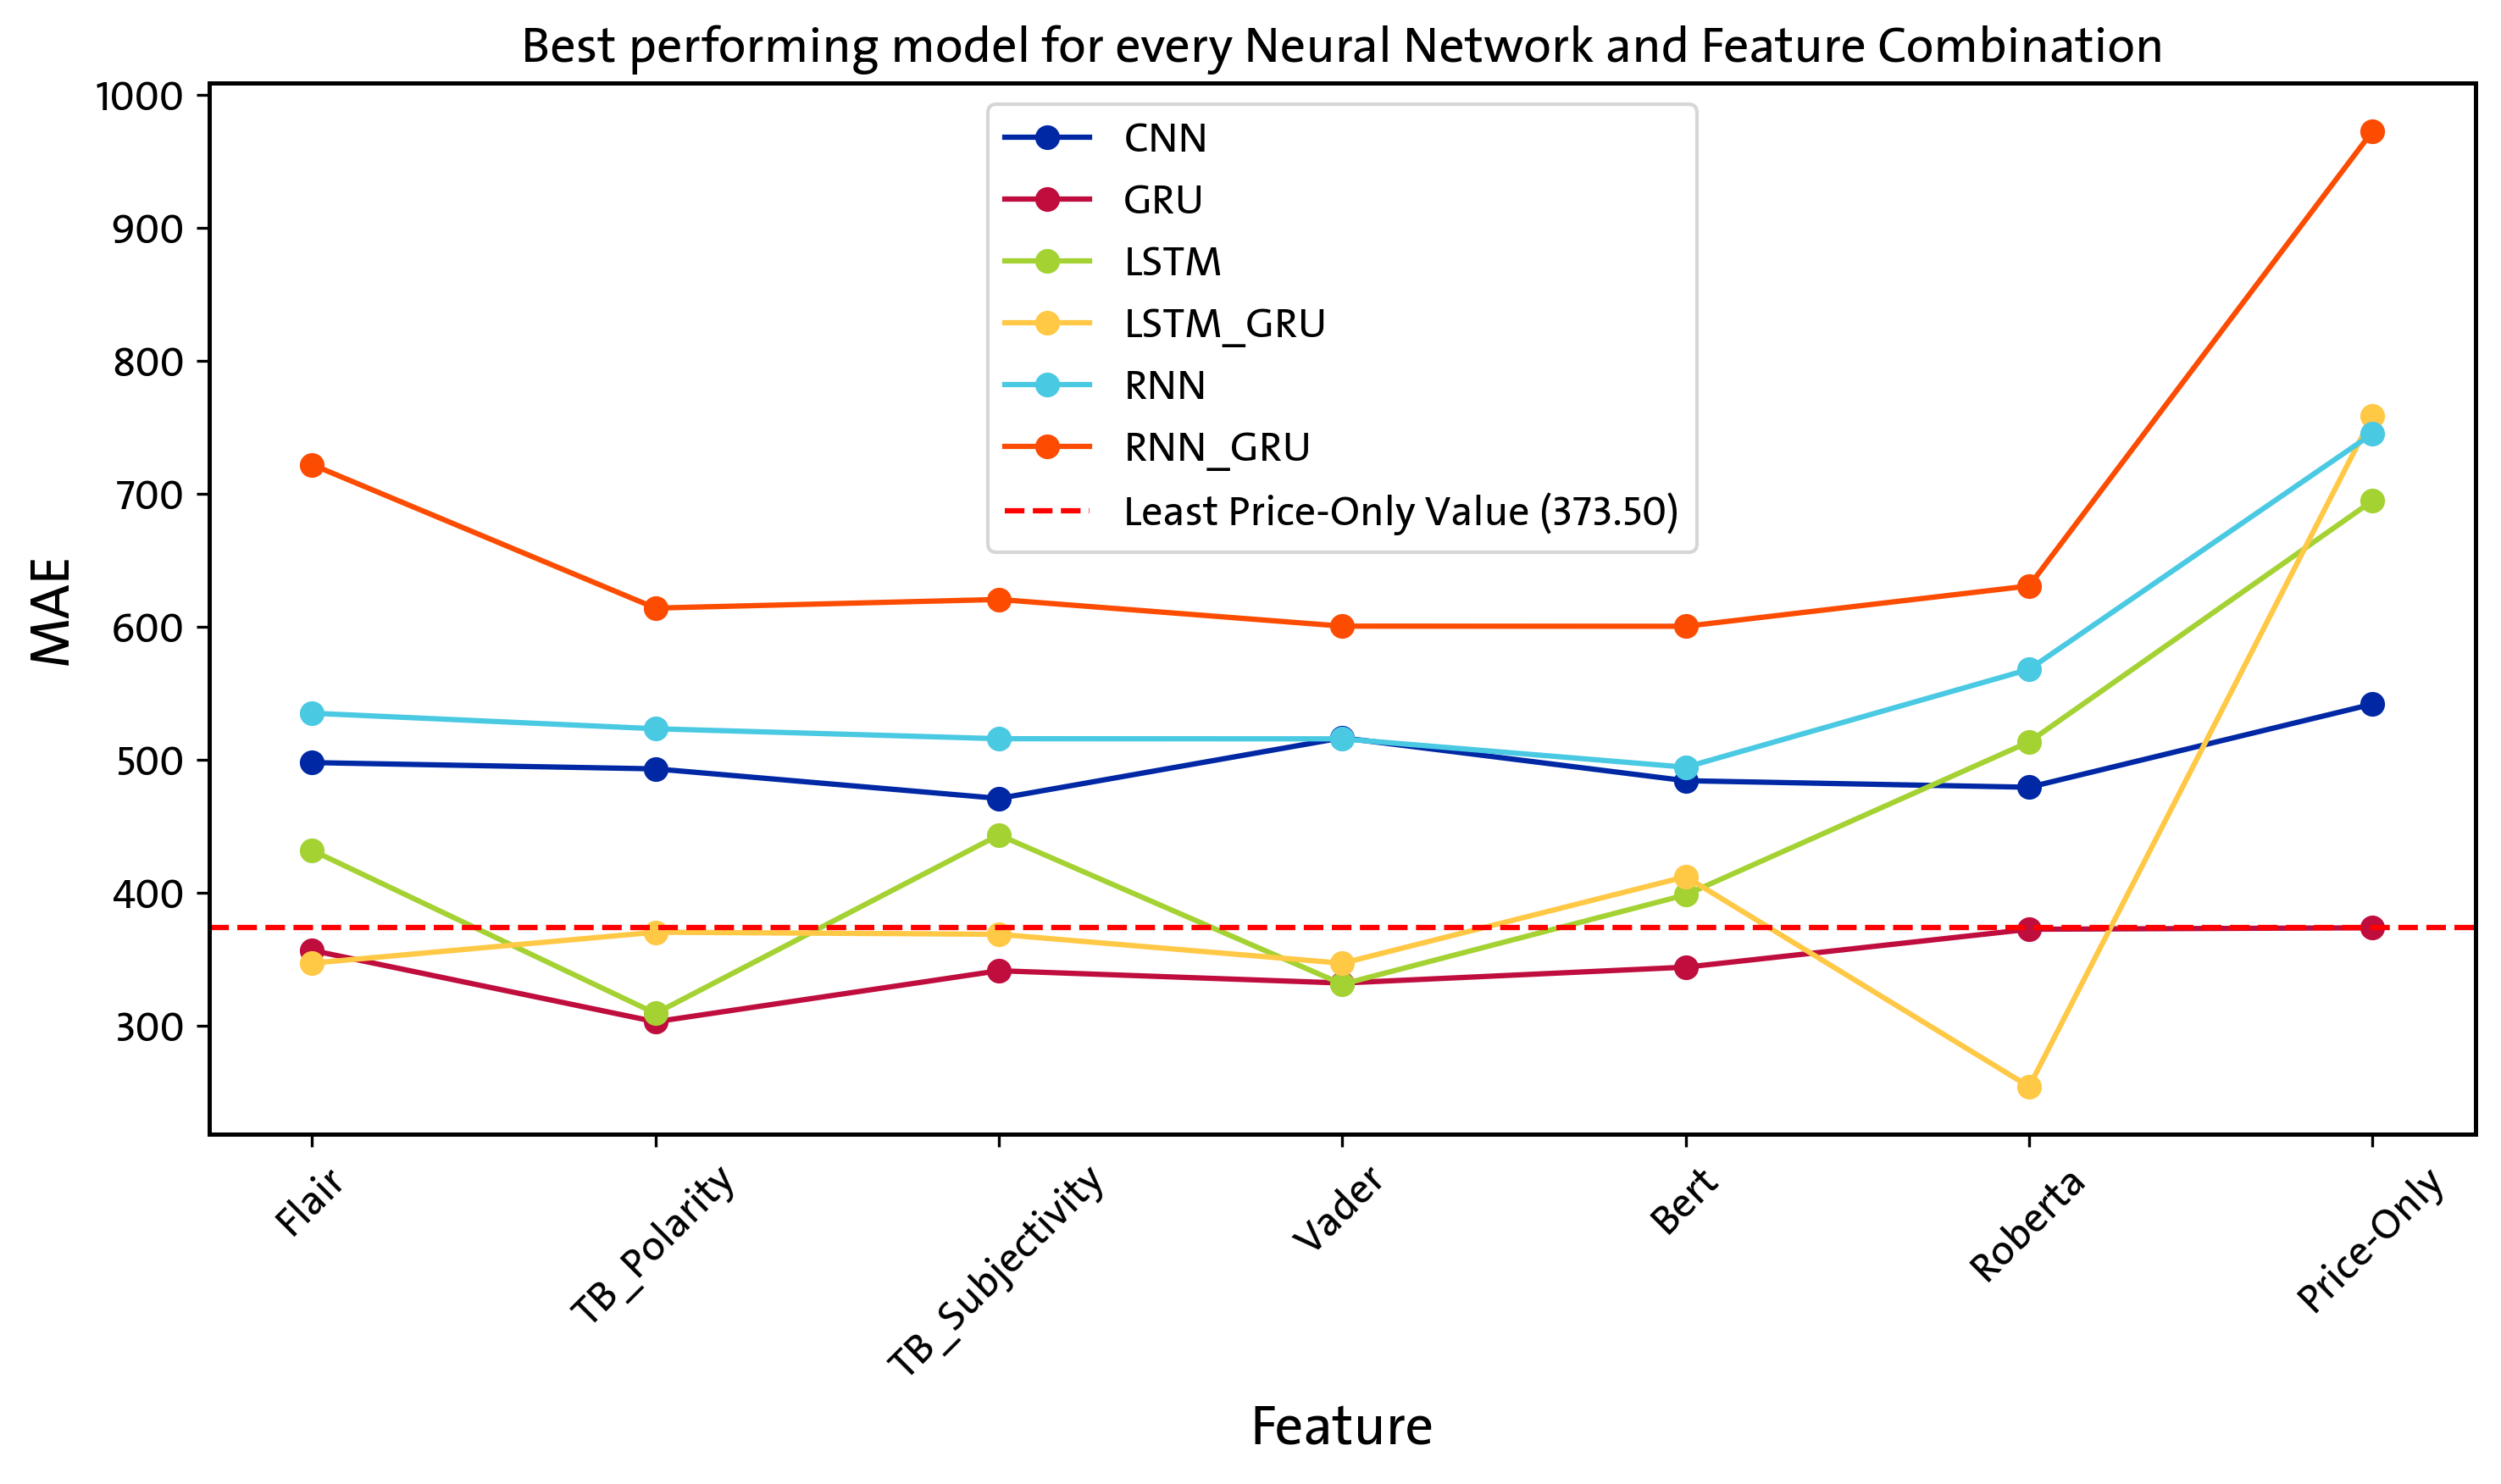

In [14]:
def create_best_performing_line_plot(df):
    df = df.transpose()
    plt.figure(figsize=(10, 6))
    
    min_price_only = df.loc['Price-Only'].min()

    # Plot lines for each network_name
    for network_name in df.columns:
        plt.plot(df.index, df[network_name], label=network_name, marker='o')
    
    plt.axhline(y=min_price_only, color='r', linestyle='--', label=f'Least Price-Only Value ({min_price_only:.2f})')

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('MAE')
    plt.title('Best performing model for every Neural Network and Feature Combination')
    plt.xticks(rotation=45)
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(f'/home/ubuntu/Masters_Thesis/results/result_plots/BestPerformingPerNNMAEFeaturePlot_W{W+1}.pdf', bbox_inches='tight', facecolor='white')
    plt.show()
    
create_best_performing_line_plot(result_df)

In [15]:
full_data.head()

,,mae_15_100_np,mae_30_100_np,mae_15_500_np,mae_30_500_np,mae_15_100_p,mae_30_100_p,mae_15_500_p,mae_30_500_p
network_name,feature,,,,,,,,
CNN,Price-Only,635.245908,541.757062,594.214681,699.928842,635.245908,541.757062,594.214681,699.928842
GRU,Price-Only,607.986103,373.496476,549.930154,976.983117,607.986103,373.496476,549.930154,976.983117
LSTM,Price-Only,694.727559,804.393650,987.645253,931.135228,694.727559,804.393650,987.645253,931.135228
LSTM_GRU,Price-Only,1083.069893,1016.937410,850.835273,758.615909,1083.069893,1016.937410,850.835273,758.615909
RNN,Price-Only,808.163752,745.233675,1125.802543,1050.056789,808.163752,745.233675,1125.802543,1050.056789


Processed-Non-Processed Change

In [16]:
def compare_mae_p_np(row):
    percentage_changes = []
    for i in range(0, int(len(row.index)/2)):
        change = - ((row[i + 4] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    
    return int(max_change),int(min_change)

full_data[['max_np_p', 'min_np_p']] = full_data.apply(compare_mae_p_np, axis=1, result_type='expand')

full_data['p_np_change'] = full_data.apply(lambda row: [row['min_np_p'], row['max_np_p']], axis=1)
p_np_change = full_data[['p_np_change']]
p_np_change = p_np_change.reset_index(drop=False)
p_np_change_exploded = p_np_change.explode('feature')

# Pivot the table
p_np_change_table = p_np_change_exploded.pivot_table(index='network_name', columns='feature', values='p_np_change', aggfunc='first')
p_np_change_table[['Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]


feature,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,
CNN,"[-17.0, 20.0]","[-21.0, 43.0]","[0.0, 9.0]","[0.0, 26.0]","[-9.0, 19.0]","[-31.0, 26.0]"
GRU,"[-5.0, 26.0]","[0.0, 45.0]","[-20.0, 34.0]","[-31.0, 45.0]","[5.0, 51.0]","[-14.0, 40.0]"
LSTM,"[-7.0, 28.0]","[-41.0, 37.0]","[-52.0, 14.0]","[-84.0, 30.0]","[-74.0, 15.0]","[-32.0, 25.0]"
LSTM_GRU,"[-86.0, 13.0]","[-36.0, 26.0]","[-20.0, 11.0]","[-7.0, 42.0]","[-14.0, 48.0]","[-8.0, 52.0]"
RNN,"[-16.0, 17.0]","[-25.0, 19.0]","[-14.0, 6.0]","[-21.0, 26.0]","[-1.0, 20.0]","[3.0, 27.0]"
RNN_GRU,"[-8.0, 47.0]","[-16.0, 32.0]","[14.0, 24.0]","[4.0, 50.0]","[-2.0, 48.0]","[3.0, 44.0]"


Epoch Changes

In [17]:
def compare_mae_epochs(row):
    percentage_changes = []
    for i in [0,1,4,5]:
        change = - ((row[i + 2] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    return int(max_change), int(min_change)

full_data[['max_epochs', 'min_epochs']] = full_data.apply(compare_mae_epochs, axis=1, result_type='expand')
full_data['epoch_change'] = full_data.apply(lambda row: [row['min_epochs'], row['max_epochs']], axis=1)
epoch_change = full_data[['epoch_change']]
epoch_change = epoch_change.reset_index(drop=False)
epoch_change_exploded = epoch_change.explode('feature')

# Pivot the table
epoch_change_table = epoch_change_exploded.pivot_table(index='network_name', columns='feature', values='epoch_change', aggfunc='first')
epoch_change_table[['Price-Only', 'Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]

feature,Price-Only,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,,
CNN,"[-29, 6]","[-14, 13]","[-37, -1]","[-16, 20]","[0, 26]","[-10, 19]","[0, 25]"
GRU,"[-161, 9]","[-43, 4]","[-43, 23]","[-72, -2]","[-61, 29]","[-21, 34]","[-22, 20]"
LSTM,"[-42, -15]","[-47, 30]","[-145, -8]","[-165, -20]","[-76, -25]","[-72, -8]","[-135, -11]"
LSTM_GRU,"[21, 25]","[-6, 48]","[16, 59]","[34, 53]","[-11, 61]","[1, 56]","[5, 49]"
RNN,"[-40, -39]","[-46, -2]","[-73, 3]","[-72, -28]","[-63, 4]","[-62, -9]","[-60, 6]"
RNN_GRU,"[-32, 8]","[-45, 50]","[-124, 10]","[-86, -3]","[-88, 20]","[-87, 50]","[-82, 35]"


15_30 change

In [18]:
def compare_mae_15_30_dimchange(row):
    percentage_changes = []
    for i in range(0, 8, 2):
        change = - ((row[i + 1] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    return int(max_change), int(min_change)

full_data[['max_15_30', 'min_15_30']] = full_data.apply(compare_mae_15_30_dimchange, axis=1, result_type='expand')
full_data['15_30_change'] = full_data.apply(lambda row: [row['min_15_30'], row['max_15_30']], axis=1)
change_15_30 = full_data[['15_30_change']]
change_15_30 = change_15_30.reset_index(drop=False)
change_15_30_exploded = change_15_30.explode('feature')

# Pivot the table
change_15_30_table = change_15_30_exploded.pivot_table(index='network_name', columns='feature', values='15_30_change', aggfunc='first')
change_15_30_table[['Price-Only', 'Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]

feature,Price-Only,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,,
CNN,"[-17, 14]","[-27, 7]","[-39, 34]","[-39, 11]","[-4, 15]","[-21, 9]","[-50, 12]"
GRU,"[-77, 38]","[3, 35]","[-23, 34]","[-8, 40]","[-26, 32]","[-36, 29]","[-13, 30]"
LSTM,"[-15, 5]","[-3, 39]","[-3, 36]","[-44, 34]","[-13, 57]","[-15, 34]","[-3, 53]"
LSTM_GRU,"[6, 10]","[-27, 38]","[-1, 49]","[7, 34]","[-41, 55]","[-15, 49]","[-36, 40]"
RNN,"[6, 7]","[-12, 34]","[-28, 36]","[0, 22]","[-38, 31]","[-18, 24]","[-28, 25]"
RNN_GRU,"[-3, 28]","[-123, 18]","[-71, 30]","[-30, 26]","[-40, 26]","[-139, 36]","[-135, 20]"
